# Particle Neural Network

Imports Three handcrafted files, in addition to the standard numpy and matplotlib moduals.  ParticleNet.py is the neural network, which takes as input 4-vectors generated using ExpodentialDistribution.py and GaussianDistribution.py which produced 3-vector momentum and a mass vector each, where the mass vector is radomly drawn from either an expodential or a gaussian distribution respectivly.  PlotResults contains a plot function, which plots the distribution of the precentages of the Particle Neural Network's predictions for a single particle.

In [1]:
from ExpodentialDistribution import Exp
from GaussianDistribution import Gauss
from ParticleNet import ParticleNet
import numpy as np
from PlotResults import plot
import matplotlib.pyplot as plt

These are the only constants needed to run this simulation thus far.  'p' the momentum is constant for all particles.  Ntrain is the number of samples the particle neural network will train on, and Ntest is the number of particles the neural network will test on.

In [2]:
p = 100
Ntrain = 1000000
Ntest = 1000000

Below, we generate our data to feed into the particle neural network.  First we create training and testing data sets from the expodential distribution modual and then the gaussian modual.  Both moduals generate a 4-vector, which includes a 3-vector momentum and a mass vector where the masses are drawn from the respective distribution at random.  Besides the 4-vector, a vector idicating that which distribution each piece of data belongs to is returned, a vector of all zeros for the expodential distribution and a vector of all ones for the gaussian.

In [3]:
ETrain,ETrainVals = Exp(p,Ntrain)
ETest,ETestVals = Exp(p,Ntest)

GTrain,GTrainVals = Gauss(p,Ntrain)
GTest,GTestVals = Gauss(p,Ntest)

Here, we are just concatinating the data from the expodential and gaussian distributions into a single training and testing data set.

In [4]:
Train = np.zeros((2*Ntrain,4))
Test = np.zeros((2*Ntest,4))
TrainVals = np.zeros(Ntrain*2)
TestVals = np.zeros(Ntest*2)

Train[:Ntrain] = ETrain
Train[Ntrain:] = GTrain
TrainVals[:Ntrain] = ETrainVals
TrainVals[Ntrain:] = GTrainVals

Test[:Ntest] = ETest
Test[Ntest:] = GTest
TestVals[:Ntest] = ETestVals
TestVals[Ntest:] = GTestVals

Below is the particle neural network being run on the data generated.

In [5]:
predict = ParticleNet(Train,TrainVals,Test)

Epoch 1/10
62500/62500 [==============================] - 31s 495us/step - loss: 0.3808 - accuracy: 0.8400
Epoch 2/10
62500/62500 [==============================] - 31s 490us/step - loss: 0.3508 - accuracy: 0.8518
Epoch 3/10
62500/62500 [==============================] - 31s 494us/step - loss: 0.3494 - accuracy: 0.8523
Epoch 4/10
62500/62500 [==============================] - 31s 495us/step - loss: 0.3485 - accuracy: 0.8525
Epoch 5/10
62500/62500 [==============================] - 31s 493us/step - loss: 0.3476 - accuracy: 0.8530
Epoch 6/10
62500/62500 [==============================] - 31s 488us/step - loss: 0.3450 - accuracy: 0.8538
Epoch 7/10
62500/62500 [==============================] - 31s 494us/step - loss: 0.3449 - accuracy: 0.8540
Epoch 8/10
62500/62500 [==============================] - 32s 507us/step - loss: 0.3449 - accuracy: 0.8537
Epoch 9/10
62500/62500 [==============================] - 31s 495us/step - loss: 0.3445 - accuracy: 0.8539
Epoch 10/10
62500/62500 [============

Below, we take a look at the masses for the expodential distribution.

Text(0.5, 1.0, 'Expodential Distrubution')

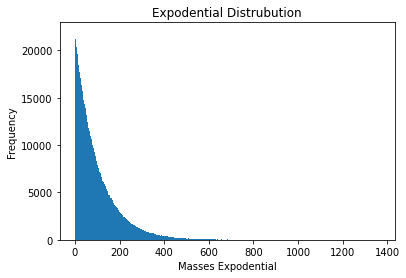

In [6]:
n, bins, patches = plt.hist(x=ETrain[:,3], bins='auto')
plt.xlabel('Masses Expodential')
plt.ylabel('Frequency')
plt.title('Expodential Distrubution')

Below is a plot of the masses randomly generated from a Gaussian distribution.

Text(0.5, 1.0, 'Normal Distrubution')

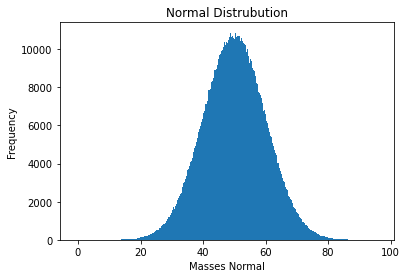

In [7]:
n, bins, patches = plt.hist(x=GTrain[:,3], bins='auto')
plt.xlabel('Masses Normal')
plt.ylabel('Frequency')
plt.title('Normal Distrubution')

Below are a few results from the predictions.  For the predictions, 0 represents the mass of the particle being from a expodential distribution and 1 represents a gaussian distribution.  As can be seen in the plot directly beneath, the model did correctly guess the expodential distribution to be such but barly.

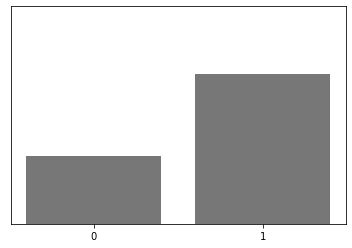

In [8]:
i = int(.1*Ntest)
plot(i, predict[i])

For the plot beneath, the model correctly guessed a Gaussian distribution by a landslide.

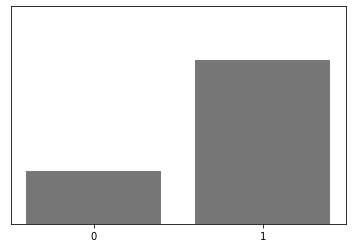

In [9]:
i = int(1.5*Ntest)
plot(i, predict[i])

However, in the plot beneath, the model incorrectly guesses a gaussian distribution for an expodential one.

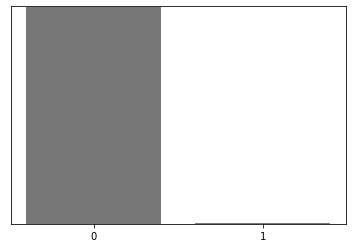

In [10]:
i = int(.25*Ntest)
plot(i, predict[i])

In [11]:
FalseExps = sum(predict[:Ntest])/Ntest*100
print("The model, on average, thought a Expodential distribution to be just that at " + str(FalseExps[0]) + " percent.")
print("And thought a Expodential distribution to be a Gaussian distribution at " + str(FalseExps[1]) + " percent.")

The model, on average, thought a Expodential distribution to be just that at 77.8409 percent.
And thought a Expodential distribution to be a Gaussian distribution at 22.1967796875 percent.


In [12]:
FalseGauss = (Ntest-sum(predict[Ntest:]))/Ntest*100
print("The model, on average, thought a Gaussian distribution to be just that at " + str(FalseGauss[0]) + " percent.")
print("And thought a Gaussian distribution to be a Expodential distribution at " + str(FalseGauss[1]) + " percent.")

The model, on average, thought a Gaussian distribution to be just that at 78.979990625 percent.
And thought a Gaussian distribution to be a Expodential distribution at 21.02496875 percent.
